# Проверка гипотез по увеличению выручки в интернет-магазине —оценить результаты A/B теста

## Загружаю данные и подготовливаю их к анализу

In [1]:
# импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Данные о гипотезах

In [3]:
# пишу код для полного вывода названий гипотез
pd.set_option('display.max_colwidth', None)

# вывожу на экран данные о всех 9 гипотез
display(hypothesis)

# изучаю информацию о датафрейме
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Вывод:** Изучив полученную информацию о данных можно сказать следующее:

- Наименования столбцов не соответствуют стилю кода. Необходимо привести их к нижнему регистру.
- Пропущенных значений нет.
- Явных дубликатов нет.

In [4]:
# привожу наименования столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

### Данные о заказах

In [5]:
# вывожу на экран первые 5 строчек датафрейма
display(orders.head())

# изучаю информацию о датафрейме
orders.info()

# проверяю на наличие явных дубликатов
orders.duplicated().sum()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


0

**Вывод:** Изучив полученную информацию о данных можно сказать следующее:

- Наименования столбцов `transactionId` и `visitorId` не соответствуют стилю кода. Необходимо привести их к нижнему регистру и поставить пробелы между словами.
- Данные столбца `date` необходимо преобразовать в нужный тип для работы со временем.
- Пропущенных значений нет.
- Явных дубликатов нет.

In [6]:
# преобразовываю данные о времени в необходимый для работы тип
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 

# заменяю наименования столбцов в соответствии со стилем кода
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

### Данные в визитах

In [7]:
# вывожу на экран первые 5 строчек датафрейма
display(visitors.head())

# изучаю информацию о датафрейме
visitors.info()

# проверяю на наличие явных дубликатов
visitors.duplicated().sum()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


0

**Вывод:** Изучив полученную информацию о данных можно сказать следующее:

- Данные столбца date необходимо преобразовать в нужный тип для работы со временем.
- Пропущенных значений нет.
- Явных дубликатов нет.

In [8]:
# преобразовываю данные о времени в необходимый для работы тип
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**ВЫВОД: Данные загружены, изучены и произведены все необходимые преобразования. Данные готовы для дальнейшего анализа.**

In [9]:
# посмотрим сколько у нас групп в АВ-тесте
sorted(visitors['group'].unique())

['A', 'B']

В тесте у нас 2 группы - А и В

In [10]:
# изучим временной интервал, узнав даты начала и окончания теста в таблицах с заказами и визитами
display(orders['date'].min())
display(visitors['date'].min())
display(orders['date'].max())
visitors['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-31 00:00:00')

Даты начала и окончания теста в обеих таблицах одинаковые. Тест проводился с 01.08.2019 по 31.08.2019.

In [11]:
# рассмотрим количество пользователей в каждой группе
orders.groupby(['group']).agg({'visitor_id':'count'})

,visitor_id
group,
A,557
B,640


В группах разное количество пользователей. В группе А - 557, а в группе В - 640.

In [12]:
# посмотрим не попадают ли какие-то пользователи в обе группы
orders[orders[['visitor_id', 'group']].duplicated()]['visitor_id'].nunique()

59

Есть пользователи, которые попали в обе группы теста одновременно. Это говорит об ошибке в сборе данных. Удаление этих пользователей повлияет на конверсию, так как мы можем удалить их только из таблицы с заказами. А в таблице с визитами данные уже агрегированы по дням. Значит мы их не удаляем.

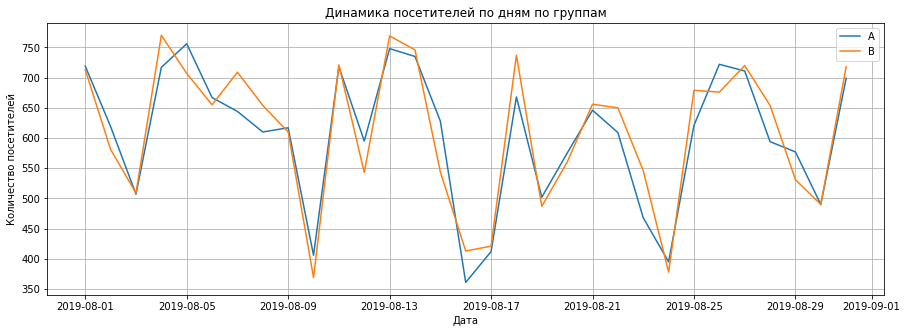

In [13]:
# посмотрим динамику посетителей по дням по группам (visitos)
group_a = visitors[visitors['group']=='A'][['date','visitors']]
group_b = visitors[visitors['group']=='B'][['date','visitors']]

plt.figure(figsize=(15,5))
plt.plot(group_a['date'], group_a['visitors'], label='A')
plt.plot(group_b['date'], group_b['visitors'], label='B')

plt.title('Динамика посетителей по дням по группам')
plt.xlabel('Дата')
plt.ylabel('Количество посетителей')
plt.grid()
plt.legend() 
plt.show()

Динамика посещений по группах распределена практически равмномерно. С одинаковым увеличением и уменьшением, за исключением периода 04.08.2019-09.08.2019

## Часть 1. Приоритизация гипотез.

9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.
    
**Задача**
- Применить фреймворк ICE для приоритизации гипотез.
- Применить фреймворк RICE для приоритизации гипотез.
- Изучить, как изменилась приоритизация гипотез при применении RICE вместо ICE.

### Применяю фреймворк ICE для приоритизации гипотез. 

In [14]:
# применяю фреймворк ICE для приоритизации гипотез
hypothesis['ice'] = round(((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']), 2)
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:** Наиболее перспективные гипотезы по ICE: "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Применяю фреймворк RICE для приоритизации гипотез.

In [15]:
# применяю фреймворк RICE для приоритизации гипотез
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** Наиболее перспективные гипотезы по RICE:  "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

### Изучаю, как изменилась приоритизация гипотез при применении RICE вместо ICE и выясняю почему так произошло.

По полученным таблицам очень хорошо видна разница в результатах приоритизации. 
- По фреймворку ICE это гипотезы: "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
- По фреймворку RICE: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".
    
В лидерах по двум фреймворках присутствуют гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 
Такая разница возникает благодаря компоненту Reach в фреймворке RICE: он показывает скольких пользователей затронет изменение. А у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" этот показатель максимальный и равен 10. **Поэтому для проведения А/В теста можно предложить гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".**

У гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" показатели:
- Reach - скольких пользователей затронет изменение, которое мы хотите внести - 10.
- Impact - насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта - 7.
- Confidence - насколько мы уверены, что это изменение повлияет на пользователей именно так	-8.
- Efforts - сколько стоит протестировать эту гипотезу - 5.

## Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты

### Построим график кумулятивной выручки по группам. 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 

In [16]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [17]:
# проверяем совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных
display(cumulativeData['date'].min())
cumulativeData['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Даты совпадают, датафрейм `cumulativeData` был создан корректно.

Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

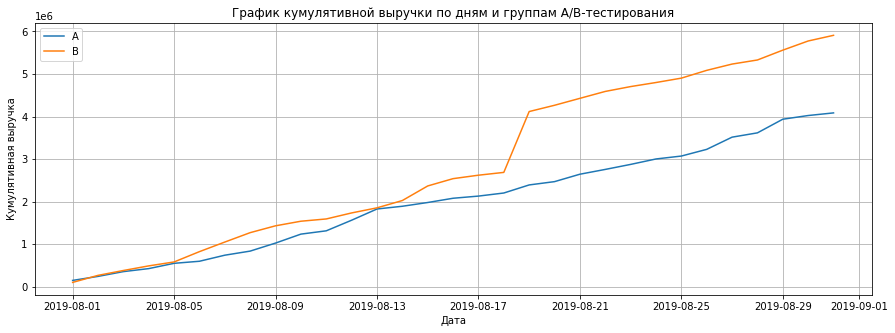

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
#plt.xticks(rotation=90)
plt.grid()
plt.legend() 
plt.show()

**Вывод:** Выручка почти равномерно увеличивается в первой половине месяца. Выручка группы В немного опережала группу А, но 13 августа кумулятивные выручки сравнялись. 
Однако, 19 августа кумулятивная выручка группы В резко увеличилась и вывела её в лидеры теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построим график кумулятивного среднего чека по группам.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

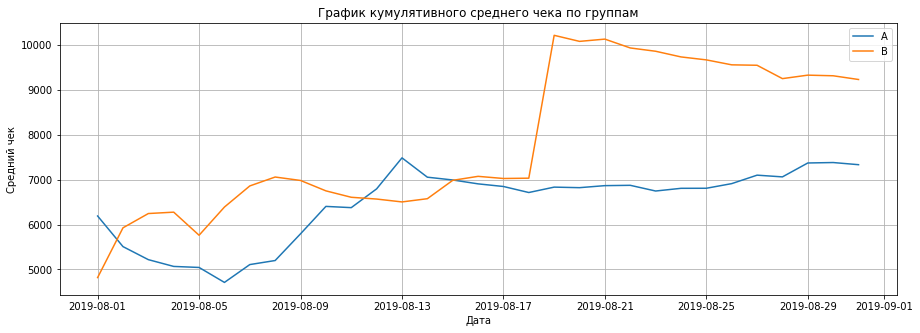

In [19]:
plt.figure(figsize=(15,5))
# строим графики среднего чека по группам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
#plt.xticks(rotation=90)
plt.grid()
plt.legend() 
plt.show()

**Вывод:** На графике кумулятивного среднего чека виднеется схожесть с предыдущим графиком. В первой половине месяца в группе В средний чек приемущественно больше, за редким исключением (1 августа и 12-15 августа). И 19 агуста снова виден резкий скачек среднего чека в группе В. Из-за этого группа стала лидером, но далее видно, что средний чек начал снижение, в то время как в группе А наоблюдается небольшое увеличение.

In [20]:
# сделаю срез по дате и посмотрю заказы 19 августа
orders.query('date == "2019-08-19"').sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B


Вот он, заказ №425 с аномальной стоимостью в 1 294 500 рублей.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline().

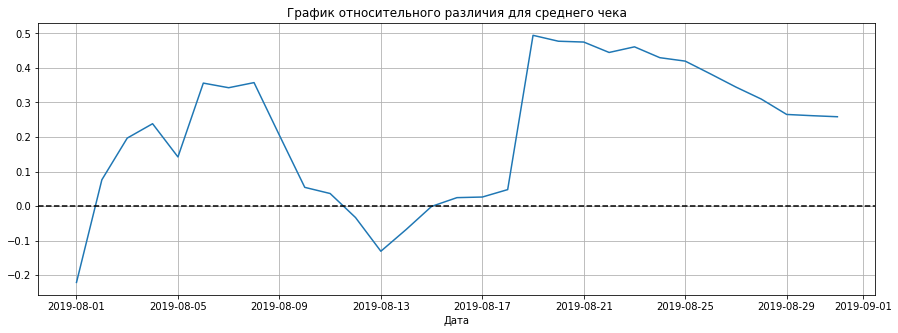

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного различия для среднего чека')
plt.xlabel('Дата')
plt.grid()
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Это подтверждает то, что в данных спрятались крупные заказы и выбросы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

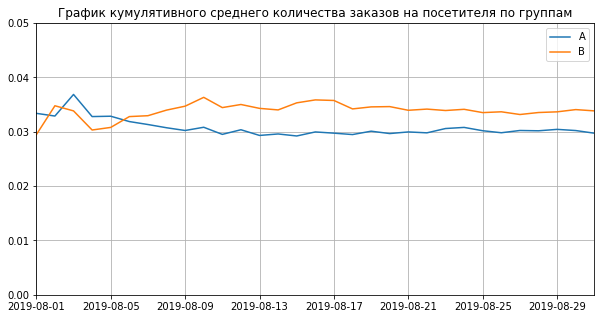

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,5))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.grid()
plt.show()

Симметричный график получился. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

###  Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

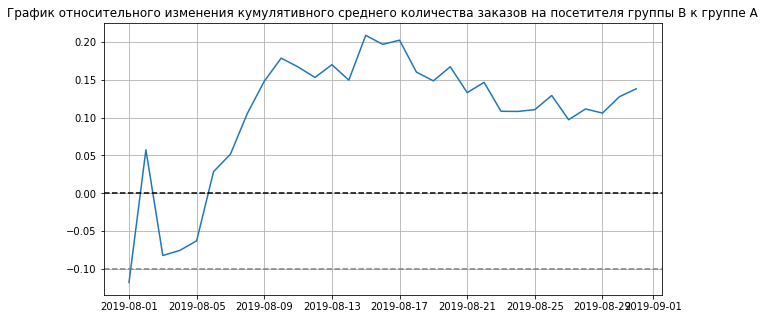

In [23]:
# построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.grid()
plt.show()

В начале теста наблюдается колебание, но начиная с 6 августа группа В выходит в лидеры и до конца периода показывает неплохие результаты, хоть и в конце конверсия начала немного снижаться. Максимальная разница была достигнута 15 августа.

### Построим точечный график количества заказов по пользователям.

In [24]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 11,9,8 и 5 заказов. Значительно больше, чем обычный пользователь за неделю.

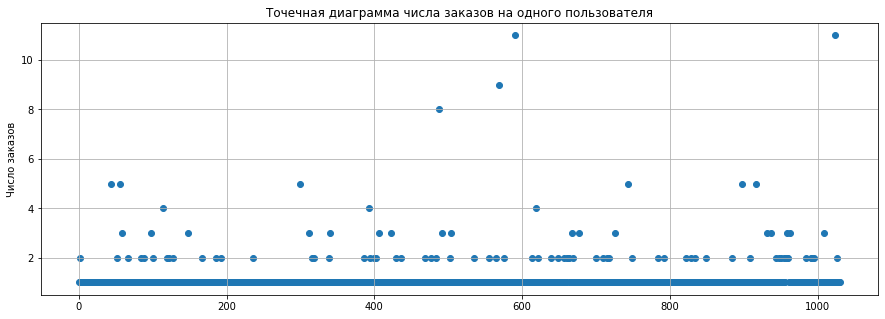

In [25]:
# построим точечную диаграмму числа заказов на одного пользователя.
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Число заказов')
plt.grid()
plt.show()

Большенство пользователей севершают только 1 заказ. Тех кто совершили 2 заказа уже не так много. А те кто совершил 3 заказа совсем мало, и пока не понятно, можно ли считать их аномалиями пока не ясно. Принято отсеивать от 1% до 5% наблюдений с крайними значениями.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [26]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей заказали больше 2 раз и не более 1% пользователей больше 4 раз. Разумно выбрать 3 или 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.
А попробую посмотреть детальнее перцентили.

In [27]:
np.percentile(ordersByUsers['orders'], [95, 96, 97, 98, 99])

array([2., 2., 2., 3., 4.])

При детальном рассметрении четко видно, что 3% пользователей совершали заказ более 2 раз. **Верхней границей будем считать 2 заказа.**

### Построим точечный график стоимостей заказов.

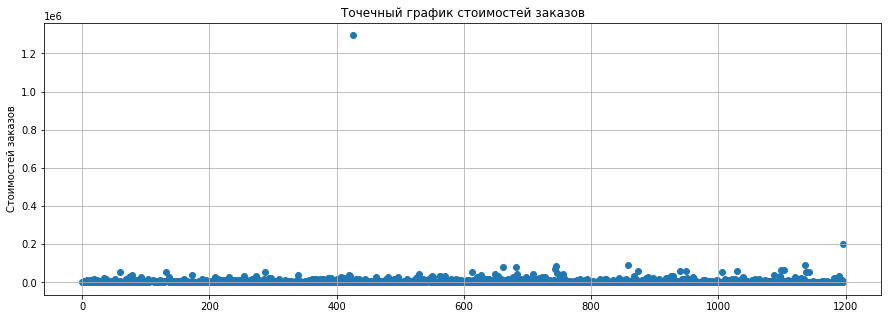

In [28]:
# построим точечную диаграмму стоимости заказов.
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимостей заказов')
plt.grid()
plt.show()

На графике отчетливо виден заказ с аномально большой стоимостью. Также виднеется еще один на сумму 200 000 руб. Остальные примерно не больше 100 000 руб. Чтобы определить более точную границу аномальных заказов рассчитаем процентили.

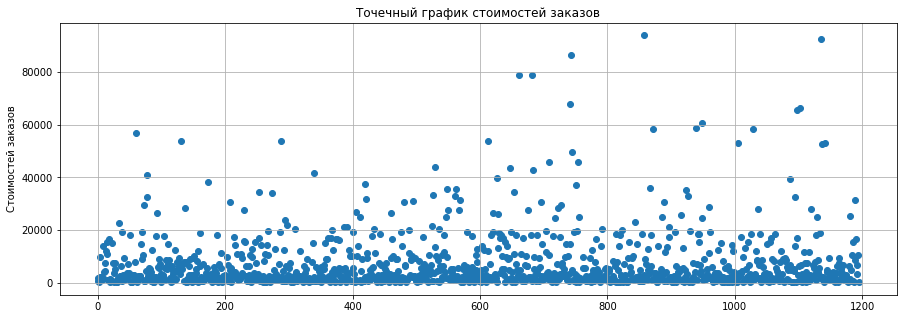

In [29]:
# построим график без двух явных выбросов
new_orders = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(new_orders)))

plt.figure(figsize=(15,5))
plt.scatter(xn_values, new_orders)

plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимостей заказов')
plt.grid()
plt.show()

Большенство пользователей севершают заказы стоимостью до 20000 руб. Тех кто совершили заказы в диапозоне 20000-30000 руб. уже не так много. А заказы стоимостью от 40000тыс совсем немного, но пока не понятно, какие заказы можно считать аномалиями.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [30]:
# посчитаем выборочные перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.20 рублей. **Установлю границу для аномалий сумму 58 233,20 руб.**

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы. 
- Нулевая H0: различий в среднем количестве заказов между группами нет. 
- Альтернативная H1: различия в среднем между группами есть.
Начнём с подготовки данных.

In [31]:
# создаем датафрейм ежедневных посещений группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# соберём агрегированные кумулятивные по дням данные о визитах
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# создаем датафрейм ежедневных посещений группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# соберём агрегированные кумулятивные по дням данные о визитах
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# соберем датафрейм количества заказов и сумарной выручки по дням в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# соберём агрегированные кумулятивные по дням данные о заказах и выручки
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# соберем датафрейм количества заказов и сумарной выручки по дням в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# соберём агрегированные кумулятивные по дням данные о заказах и выручки
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# соберем все полученные таблицы в один датафрейм
data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# выведем на экран первые 5 строк
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [32]:
# создаем датафрейм со списком пользователей и количество совершенных заказов в группе А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# создаем датафрейм со списком пользователей и количество совершенных заказов в группе В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [33]:
# создаем выборку, где каждый элемент — число заказов определённого пользователя из группы А, в том числе ноль
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


# создаем выборку, где каждый элемент — число заказов определённого пользователя из группы В, в том числе ноль
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой.

In [34]:
display("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("Различие в средних = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'p-value = 0.017'

'Различие в средних = 0.138'

**Вывод:** По «сырым» данным есть различия в среднем числе заказов групп A и B.
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можем отвергнуть. Относительный выйгрыш группы B равен 13.8% — второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Проверим статистическую значимость различий в среднем чеке между сегментами. 
- Нулевая гипотеза Н0: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза Н1: различия в среднем чеке между группами есть. 
    
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов.
    
А ещё найдём относительные различия в среднем чеке между группами.

In [35]:
display('p-value = {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
       )
display('Различие в средних = {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
       ) 

'p-value = 0.729'

'Различие в средних = 0.259'

**Вывод:** P-value = 0,729 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A. И поскольку относительное различие среднего чека между сегментами составляет ~26%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Помним, что найденные 95-й и 99-й перцентили средних чеков равны 28 000, 58 233.20 рублям. А 95-й, 96-й, 97-й, 98-й и 99-й перцентили количества заказов на одного пользователя равны 2, 2, 2, 3, 4 заказа на пользователя.
    
Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 58 234 рублей. Так мы уберём 3% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. 

In [36]:
# срезы пользователей с числом заказов больше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# срез пользователей, совершивших заказы дороже 58 234
usersWithExpensiveOrders = orders[orders['revenue'] > 58234]['visitor_id']

# объединим их в таблице
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# выведим на экран первые 5 строк таблицы с аномальными данными и посмотри их количество
display(abnormalUsers.head(5))
abnormalUsers.shape[0] 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

31

Всего 31 аномальный пользователь.
    
Узнаем, как их действия повлияли на результаты теста. 
Сформулируем гипотезы.

- Нулевая H0: различий в среднем количестве заказов между группами нет.
- Альтернативная H1: различия в среднем между группами есть. Начнём с подготовки данных.
    
Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [37]:
# подготовим выборки количества заказов по пользователям в группе А без аномальных значений
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# подготовим выборки количества заказов по пользователям в группе В без аномальных значений
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

# применим статистический критерий Манна-Уитни к полученным выборкам
display('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('Различие в средних = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

'p-value = 0.010'

'Различие в средних = 0.174'

**Вывод:** 
По очищенным данным есть различия в среднем числе заказов групп A и B. Первое число — p-value = 0.010 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можем отвергнуть. Относительный выйгрыш группы B равен 17.4%. Это показатель стал немного меньше, чем 26% при "сырых" данных, но остается на высоком уровне.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Проверим статистическую значимость различий в среднем чеке по "очищенным" данным между сегментами.

- Нулевая гипотеза Н0: различий в среднем чеке между группами нет.
- Альтернативная гипотеза Н1: различия в среднем чеке между группами есть.

In [38]:
display(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "Различие в средних = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'p-value = 0.798'

'Различие в средних = -0.020'

**Вывод:** P-value = 0,798 значительно больше 0.05. После удаления аномальных значений даже немного увеличелся. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.
    
А вот средний чек группы B оказался незначительно ниже среднего чека группы A - на 2%. А по "сырым" данным, он был больше аж на почти 26%.

### Примаем решение по результатам теста.  
    
Имеющиеся факты:
- Наблюдается статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия среднего количества заказов между группами сообщает, что результаты группы B намного лучше группы A. И максимальная разница была достигнута 15 августа.
- График различия среднего чека говорит о том, что результаты группы B лучше на 25%
    
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным.

Решение **Остановить тест, зафиксировать победу группы В**

**ОБЩИЙ ВЫВОД:**
-  Кумулятивная выручка почти равномерно увеличивается в первой половине месяца. Выручка группы В немного опережала группу А, но 13 августа они сравнялись. Однако, 19 августа кумулятивная выручка группы В резко увеличилась и вывела её в лидеры теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
- На графике кумулятивного среднего чека виднеется схожесть с предыдущим графиком. В первой половине месяца в группе В средний чек приемущественно больше, за редким исключением (1 августа и 12-15 августа). И 19 агуста снова виден резкий скачек среднего чека в группе В. Из-за этого группа стала лидером, но далее видно, что средний чек начал снижение, в то время как в группе А наоблюдается небольшое увеличение.
- В нескольких точках графика относительного изменения кумулятивного среднего чека группы B к группе A различия между сегментами резко «скачет». Это подтверждает то, что в данных спрятались крупные заказы и выбросы.
- График кумулятивного среднего количества заказов на посетителя по группам получился симметричный. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.
- На графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A в начале теста наблюдается колебание, но начиная с 6 августа группа В выходит в лидеры и до конца периода показывает неплохие результаты, хоть и в конце конверсия начала немного снижаться. Максимальная разница была достигнута 15 августа.
- На точечном графике количества заказов по пользователям видно, что большенство пользователей севершают только 1 заказ. Тех кто совершили 2 заказа уже не так много. А те кто совершил 3 заказа совсем мало, и пока не понятно, можно ли считать их аномалиями пока не ясно. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. 
- Посчитали 95-й, 96-й, 97-й,98-й и 99-й перцентили количества заказов на пользователя и выяснили, что 3% пользователей совершали заказ более 2 раз. Верхней границей будем считать 2 заказа.
- На точечном графике стоимостей заказов отчетливо виден заказ с аномально большой стоимостью. Также виднеется еще один на сумму 200 000 руб. Остальные примерно не больше 100 000 руб. Чтобы определить более точную границу аномальных заказов рассчитаем процентили.
- 95-й и 99-й перцентили стоимости заказов показали, что не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.20 рублей. Установлю границу для аномалий сумму 58 233,20 руб.
    
- Сформулируем гипотезы о различии в среднем количестве заказов между группами:
    
1. Нулевая H0: различий в среднем количестве заказов между группами нет.
2. Альтернативная H1: различия в среднем между группами есть.
    
В статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным есть различия в среднем числе заказов групп A и B. Р-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можем отвергнуть. Относительный выйгрыш группы B равен 13.8%.
    
По очищенным данным есть различия в среднем числе заказов групп A и B. Первое число — p-value = 0.010 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можем отвергнуть. Относительный выйгрыш группы B равен 17.4%. Это показатель стал немного меньше, чем 26% при "сырых" данных, но остается на высоком уровне.

**Принимаем альтернативную гипотезу о том, что различия в среднем количестве заказов между группами есть.**
    
- Сформулируем гипотезы о различии в среднем количестве заказов между группами:
1. Нулевая гипотеза Н0: различий в среднем чеке между группами нет.
2. Альтернативная гипотеза Н1: различия в среднем чеке между группами есть.
    
Рассчитывая статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным получили следующие результаты. P-value = 0,729 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A.
    
После удаления аномальных значений статистическую значимость различий р-value = 0,798 значительно больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. А вот средний чек группы B оказался незначительно ниже среднего чека группы A - на 2%. А по "сырым" данным, он был больше аж на почти 26%.

**Принимаем нулевую гипотезу о том, что различия в среднем чеке между группами нет.**